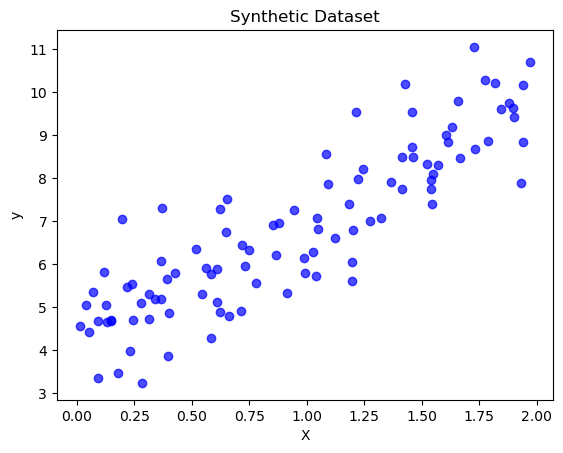

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Features
y = 4 + 3 * X + np.random.randn(100, 1)  # Target with noise

# Plot the dataset
plt.scatter(X, y, color="blue", alpha=0.7)
plt.title("Synthetic Dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


Epoch 0: Loss = 31.0093
Epoch 10: Loss = 1.2489
Epoch 20: Loss = 1.0280
Epoch 30: Loss = 0.9176
Epoch 40: Loss = 0.8622
Epoch 50: Loss = 0.8345
Epoch 60: Loss = 0.8206
Epoch 70: Loss = 0.8136
Epoch 80: Loss = 0.8101
Epoch 90: Loss = 0.8083


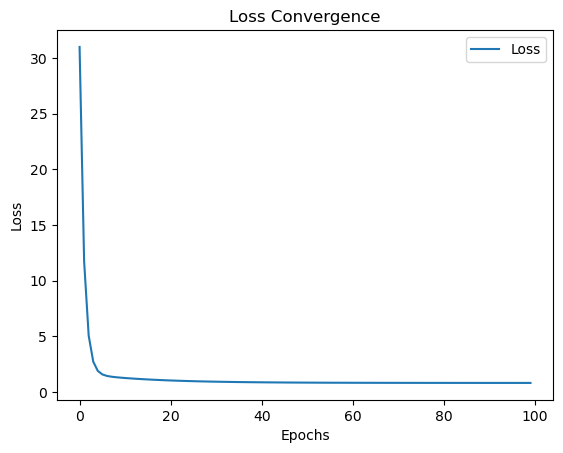

Final Parameters: [[4.16104533]
 [2.81783733]]


In [2]:
# Gradient Descent for Linear Regression
def compute_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def gradient_descent(X, y, learning_rate=0.1, epochs=100):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    theta = np.random.randn(n + 1, 1)  # Initialize parameters
    loss_history = []

    for epoch in range(epochs):
        y_pred = X_b.dot(theta)
        gradients = 2 / m * X_b.T.dot(y_pred - y)
        theta -= learning_rate * gradients
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

        # Print loss at regular intervals
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return theta, loss_history

# Run Gradient Descent
theta_final, loss_history = gradient_descent(X, y)

# Plot loss over epochs
plt.plot(range(len(loss_history)), loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence")
plt.legend()
plt.show()

print("Final Parameters:", theta_final)


In [4]:
def stochastic_gradient_descent(X, y, learning_rate=0.1, epochs=100):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(n + 1, 1)
    loss_history = []

    for epoch in range(epochs):
        for i in range(m):  # Update parameters for each instance
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
        y_pred = X_b.dot(theta)
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

    return theta, loss_history

# Run SGD
theta_sgd, loss_sgd = stochastic_gradient_descent(X, y)


In [5]:
def mini_batch_gradient_descent(X, y, batch_size=20, learning_rate=0.1, epochs=100):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(n + 1, 1)
    loss_history = []

    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]
            gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

        y_pred = X_b.dot(theta)
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

    return theta, loss_history

# Run Mini-batch GD
theta_mb, loss_mb = mini_batch_gradient_descent(X, y)


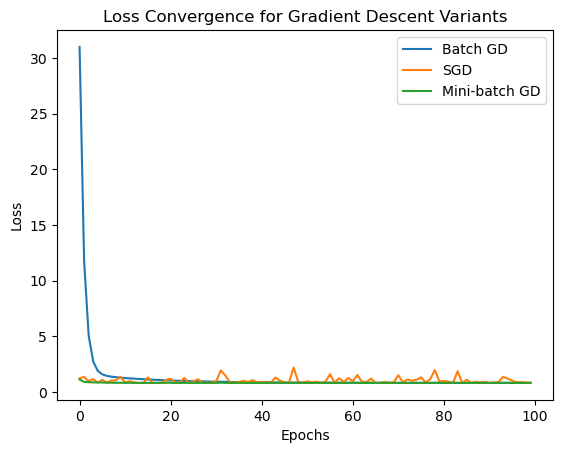

In [6]:
plt.plot(range(len(loss_history)), loss_history, label="Batch GD")
plt.plot(range(len(loss_sgd)), loss_sgd, label="SGD")
plt.plot(range(len(loss_mb)), loss_mb, label="Mini-batch GD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence for Gradient Descent Variants")
plt.legend()
plt.show()


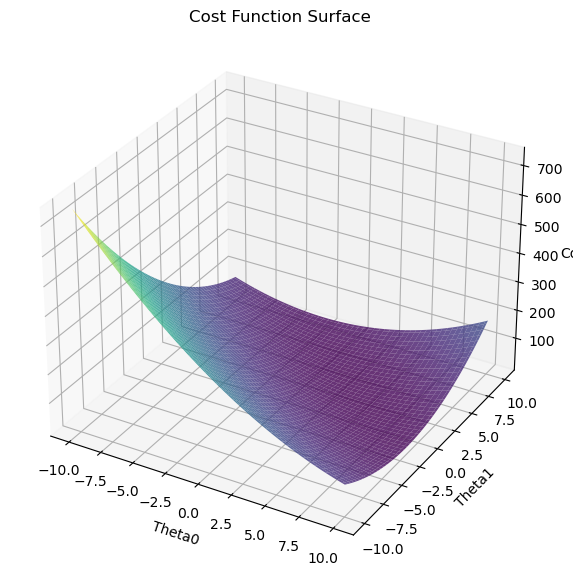

In [8]:
# Define compute_loss function for clarity
def compute_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Create design matrix (X_b) with bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term

# Define the range for parameters theta0 and theta1
theta0_range = np.linspace(-10, 10, 100)
theta1_range = np.linspace(-10, 10, 100)
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)

# Compute cost function values for each combination of theta0 and theta1
J_vals = np.array([
    [compute_loss(y, X_b.dot(np.array([[t0], [t1]])))
     for t0, t1 in zip(row0, row1)]
    for row0, row1 in zip(Theta0, Theta1)
])

# Visualize the cost function surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta0, Theta1, J_vals, cmap="viridis", alpha=0.8)
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
plt.title("Cost Function Surface")
plt.show()
